<a href="https://colab.research.google.com/github/n4i9kita/ExploratoryProject/blob/main/K_Armed_Bandit_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCB1 Algorithm
At any time t plays the arm j that maximizes

$\bar{X}_{j,n_j} + \sqrt{\frac{2ln(t)}{n_j}}$


In [ ]:
import math
import matplotlib.pyplot as plt
#class UCB1 describes and simulates behaviour of UCB1 algorithms 
class UCB1:
  def __init__(self, arm, c):
    self.reward_sum = np.zeros(arm)              #stores the total reward value of each arm
    self.reward_count = np.zeros(arm)            #stores how many times each arm is selected 
    self.array = np.zeros(arm)                   #stores the mean reward value of each arm
    self.time = 0                                #counts the time steps
    self.c = c                                   #a variable in UCB1 algorithm
    self.lastAction = None                       #stores the last arm choosen by the algorithm

  #this function selects the arm as proposed by UCB1 algorithm
  def action(self):
    ucb_estimation = self.array + self.c * np.sqrt(np.log(self.time + 1) / (self.reward_count + 1e-5))    #this function selects the arm as proposed by UCB1 algorithm      
    maxaction = np.argmax(ucb_estimation)
    action = np.where(ucb_estimation == maxaction)[0]
    if len(action) == 0:
      a = maxaction
    else :
      a = np.random.choice(action)
    self.lastAction = a;
    self.time += 1;
    return a
  
  #this function updates the reward sum , average reward, count of selection of that arm
  def interpreter(self, reward):
    key = self.lastAction
    self.reward_count[key] += 1
    self.reward_sum[key] += reward
    self.array[key] = self.reward_sum[key]/self.reward_count[key] 

  #reset all the values to default
  def reset(self):
    self.reward_sum[:] = 0
    self.reward_count[:] = 0
    self.array[:] = 0;
    self.time = 0
    self.lastAction = None 

# $\epsilon$-greedy Algorithm

At any time play the best arm with probablity 1-$\epsilon$ and any random arm with probability $\epsilon$.


In [ ]:
import math
import matplotlib.pyplot as plt
#class EpsilonGreedy describes and simulates the e-greedy algorithm
class EpsilonGreedy:
  def __init__(self, arm, c):
    self.reward_sum = np.zeros(arm)               #stores the total reward value of each arm    
    self.reward_count = np.zeros(arm)             #stores how many times each arm is selected
    self.array = np.zeros(arm)                    #stores the mean reward value of each arm
    self.time = 0                                 #counts the time steps
    self.c = c                                    #stores value of epsilon
    self.lastAction = None                        #stores the last arm choosen by the algorithm


  #this function chooses the arm as proposed by e-greedy algorithm
  def action(self):
    if np.random.rand() < self.c:
      a = np.random.choice(len(self.array))
    else:
      maxaction = np.argmax(self.array)
      action = np.where(self.array == maxaction)[0]
      if len(action) == 0:
        a = maxaction
      else :
        a = np.random.choice(action)
    self.lastAction = a;
    self.time += 1;
    return a
  
  #this function updates updates the reward sum , average reward, count of selection of that arm
  def interpreter(self, reward):
    key = self.lastAction
    self.reward_count[key] += 1
    self.reward_sum[key] += reward
    #self.exploration[key] = math.sqrt(self.c*math.log(self.time)/ self.reward_count[key])
    self.array[key] = self.reward_sum[key]/self.reward_count[key] 

  #this function resets all the value of the variables
  def reset(self):
    self.reward_sum[:] = 0
    self.reward_count[:] = 0
    #self.exploration[:] = 1
    self.array[:] = 0;
    #self.array = 10*self.array
    self.time = 0
    self.lastAction = None 


# UCBV Algorithm

At any time t plays the arm j that maximizes,

$\bar{X}_{j,t} + \sqrt{\frac{2\theta V_{j,n_{j}} log(t)}{n_{j}}} + \frac{3\theta log(t)}{n_{j}}$


In [ ]:
#class UCB_V desribes and simulates behaviour of UCB-V algorithms
class UCB_V:
  def __init__(self, arm, c):
    self.reward_sum = np.zeros(arm)                    #stores the total reward value of each arm
    self.reward_count = np.zeros(arm)                  #stores how many times each arm is selected
    self.variance = np.zeros((10,10000))               #stores every reward achieved by each arm            
    self.var = np.zeros(arm)                           #stores variance of rewards for each arm
    self.array = np.zeros(arm)                         #stores the mean reward value of each arm
    self.time = 0                                      #counts the time steps
    self.c = c                                         #a variable in UCB-V algorithm
    self.lastAction = None                             #stores the last arm choosen by the algorithm


  #this function selects the arm as proposed by UCB1 algorithm
  def action(self):
    ucbv_estimation = self.array + np.sqrt(2*self.c*self.var*np.log(self.time + 1) / (self.reward_count + 1e-5))    #this function selects the arm as proposed by UCB1 algorithm
    for i in range(10):
      ucbv_estimation[i] = ucbv_estimation[i] + 3*self.c+math.log(self.time+1)/(self.reward_count[i] + 1e-5)
    maxaction = np.argmax(ucbv_estimation)
    action = np.where(ucbv_estimation == maxaction)[0]
    if len(action) == 0:
      a = maxaction
    else :
      a = np.random.choice(action)
    self.lastAction = a;
    self.time += 1;
    return a
  
  #this function updates the reward sum , average reward, count of selection of that arm
  def interpreter(self, reward):
    key = self.lastAction
    key1 = int(self.reward_count[key])
    self.variance[key][key1] = reward
    self.reward_count[key] += 1
    self.reward_sum[key] += reward
    var1 = np.var(self.variance[key][0:key1+1])
    self.var[key] = var1
    self.array[key] = self.reward_sum[key]/self.reward_count[key]

  #reset all the values to default
  def reset(self):
    self.reward_sum[:] = 0
    self.reward_count[:] = 0
    self.array[:] = 0
    #self.array = 100*self.array
    self.variance = np.zeros((10,10000))
    self.time = 0
    self.lastAction = None  

# Experiment with Normal Distribution

##Class describing different arms with its true reward value in a normal distribution 

In [ ]:
import numpy as np

#class describing true mean reward value of different arms
#it is a normal_distribution 
class bandit:
  def __init__( self, arm, mean, sd ):
    self.arm = arm;
    self.mean = mean;
    self.sd = sd;
    self.array = np.random.normal(mean,sd,arm)
    self.optimum = np.argmax(self.array)
  
  def reset(self):
    self.array = np.random.normal(self.mean, self.sd, self.arm)
    self.optimum = np.argmax(self.array)

##Action for normal distibution:

Complted Iteration: 100
Complted Iteration: 200
Complted Iteration: 300
Complted Iteration: 400
Complted Iteration: 500
Complted Iteration: 600
Complted Iteration: 700
Complted Iteration: 800
Complted Iteration: 900
Complted Iteration: 1000
Complted Iteration: 1100
Complted Iteration: 1200
Complted Iteration: 1300
Complted Iteration: 1400
Complted Iteration: 1500
Complted Iteration: 1600
Complted Iteration: 1700
Complted Iteration: 1800
Complted Iteration: 1900
Complted Iteration: 2000


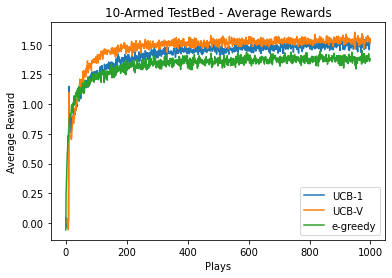

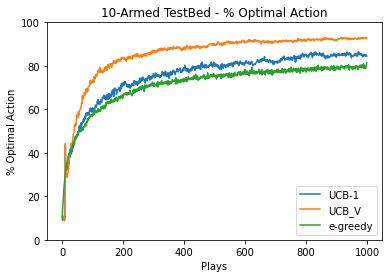

In [ ]:
b1 = bandit(10,0,1)                              #it describes the 10 different arms with normal distribution with mean 0 and variance 1
b = UCB1(10,2)                                   #it simulates UCB1 algorithm
b2 = UCB_V(10,0.04)                              #it simulates UCB-V algorithm
b3 = EpsilonGreedy(10,0.1)                       #it simulates e-greedy algorithm

rewards = np.zeros(1000)                         #stores reward acheived at each time step by UCB-1 algorithm
rewards1 = np.zeros(1000)                        #stores reward acheived at each time step by UCB-V algorithm
rewards2 = np.zeros(1000)                        #stores reward acheived at each time step by e-greedy algorithm

optimum1 = np.zeros(1000)                        #stores number of times best arm is selected by UCB-1 algorithm
optimum2 = np.zeros(1000)                        #stores number of times best arm is selected by UCB-V algorithm
optimum3 = np.zeros(1000)                        #stores number of times best arm is selected by e-greedy algorithm
for i in range(2000):
  b.reset()
  b1.reset()
  b2.reset()
  b3.reset()
  if (i+1)% 100 == 0:
    print("Complted Iteration:", i+1)
  for j in range(1000):
    a1 = b2.action()
    a2 = np.random.normal(b1.array[a1],scale= 1)
    #a2 = 
    b2.interpreter(reward=a2)
    actionS = b.action()
    rewardS = np.random.normal(b1.array[actionS], scale= 1)
    b.interpreter(reward=rewardS)
    c1 = b3.action()
    c2 = np.random.normal(b1.array[c1], scale = 1)
    b3.interpreter(reward=c2)
    rewards[j] += rewardS
    rewards1[j] += a2
    rewards2[j] += c2
    if a1 == b1.optimum:
      optimum2[j] += 1
    if actionS == b1.optimum:
      optimum1[j] += 1;
    if c1 == b1.optimum:
      optimum3[j] += 1;


#averaging over 2000 runs
rewards = rewards/2000                            
rewards1 = rewards1/2000
rewards2 = rewards2/2000
optimum1 = optimum1/2000
optimum2 = optimum2/2000
optimum3 = optimum3/2000


#plotting average reward at each step for all algorithms
plt.title("10-Armed TestBed - Average Rewards")
plt.plot(rewards,label = "UCB-1")
plt.plot(rewards1,label = "UCB-V")
plt.plot(rewards2,label = "e-greedy")
plt.ylabel('Average Reward')
plt.xlabel('Plays')
plt.legend()
plt.show()


#plotting % of optimal action selected for all algorithms
plt.title("10-Armed TestBed - % Optimal Action")
plt.plot(optimum1*100, label = "UCB-1")
plt.plot(optimum2*100, label = "UCB_V")
plt.plot(optimum3*100, label = "e-greedy")
plt.ylim(0, 100)
plt.ylabel('% Optimal Action')
plt.xlabel('Plays')
plt.legend()
plt.show()

# Experiment with heavy-tailed distribution

##Class describing different arms with its true reward value in a heavy-tailed distribution

In [ ]:
#class describing true mean reward value of different arms
#it is a heavy-tailed distribution 
class bandit1:
  def __init__( self,mean, size):
    self.mean = mean
    self.size = size
    self.array = np.random.gumbel(loc=mean,size=size)
    self.optimum = np.argmax(self.array)

  def reset(self):
    self.array = np.random.gumbel(loc=self.mean,size=self.size)
    self.optimum = np.argmax(self.array)

##Action for heavy-tailed distibution:

Complted Iteration: 100
Complted Iteration: 200
Complted Iteration: 300
Complted Iteration: 400
Complted Iteration: 500
Complted Iteration: 600
Complted Iteration: 700
Complted Iteration: 800
Complted Iteration: 900
Complted Iteration: 1000
Complted Iteration: 1100
Complted Iteration: 1200
Complted Iteration: 1300
Complted Iteration: 1400
Complted Iteration: 1500
Complted Iteration: 1600
Complted Iteration: 1700
Complted Iteration: 1800
Complted Iteration: 1900
Complted Iteration: 2000


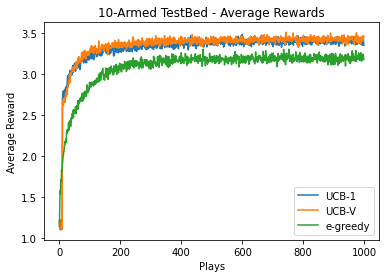

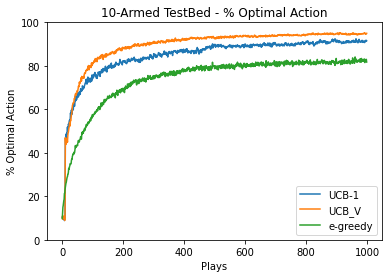

In [ ]:
b11 = bandit1(0,10)                               #it describes the 10 different arms with heavy-tailed distribution with mean 0
b = UCB1(10,2)                                    #it simulates UCB1 algorithm
b2 = UCB_V(10,0.04)                           #it simulates UCB-V algorithm
b3 = EpsilonGreedy(10,0.1)                        #it simulates e-greedy algorithm

rewards = np.zeros(1000)                          #stores reward acheived at each time step by UCB-1 algorithm
rewards1 = np.zeros(1000)                         #stores reward acheived at each time step by UCB-V algorithm
rewards2 = np.zeros(1000)                         #stores reward acheived at each time step by e-greedy algorithm

optimum1 = np.zeros(1000)                         #stores number of times best arm is selected by UCB-1 algorithm
optimum2 = np.zeros(1000)                         #stores number of times best arm is selected by UCB-V algorithm
optimum3 = np.zeros(1000)                         #stores number of times best arm is selected by e-greedy algorithm
for i in range(2000):
  b.reset()
  b11.reset()
  b2.reset()
  b3.reset()
  if (i+1)% 100 == 0:
    print("Complted Iteration:", i+1)
  for j in range(1000):
    a1 = b2.action()
    a2 = np.random.gumbel(b11.array[a1],scale= 1)
    #a2 = 
    b2.interpreter(reward=a2)
    actionS = b.action()
    rewardS = np.random.gumbel(b11.array[actionS], scale= 1)
    b.interpreter(reward=rewardS)
    c1 = b3.action()
    c2 = np.random.gumbel(b11.array[c1], scale = 1)
    b3.interpreter(reward=c2)
    rewards[j] += rewardS
    rewards1[j] += a2
    rewards2[j] += c2
    if a1 == b11.optimum:
      optimum2[j] += 1
    if actionS == b11.optimum:
      optimum1[j] += 1;
    if c1 == b11.optimum:
      optimum3[j] += 1;
    
#averaging over 2000 runs
rewards = rewards/2000
rewards1 = rewards1/2000
rewards2 = rewards2/2000
optimum1 = optimum1/2000
optimum2 = optimum2/2000
optimum3 = optimum3/2000

#plotting average reward at each step for all algorithms
plt.title("10-Armed TestBed - Average Rewards")
plt.plot(rewards,label = "UCB-1")
plt.plot(rewards1,label = "UCB-V")
plt.plot(rewards2,label = "e-greedy")
plt.ylabel('Average Reward')
plt.xlabel('Plays')
plt.legend()
plt.show()

#plotting % of optimal action selected for all algorithms
plt.title("10-Armed TestBed - % Optimal Action")
plt.plot(optimum1*100, label = "UCB-1")
plt.plot(optimum2*100, label = "UCB_V")
plt.plot(optimum3*100, label = "e-greedy")
plt.ylim(0, 100)
plt.ylabel('% Optimal Action')
plt.xlabel('Plays')
plt.legend()
plt.show()